In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:

ms = pd.read_csv(
    'microsoft.csv',
    index_col=0
)
ms.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [3]:
ms.iloc[0, 0]

46.73

In [4]:
ms.loc['2014-12-31', 'Open':'Low']

Open    46.730000
High    47.439999
Low     46.450001
Name: 2014-12-31, dtype: float64

In [5]:
ms.shape

(780, 6)

In [6]:
ms.describe()

,Open,High,Low,Close,Adj Close,Volume
count,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,58.912308,59.372308,58.465000,58.945397,56.931553,2.978900e+07
std,12.852040,12.868060,12.802831,12.830350,13.670080,1.522319e+07
min,40.340000,40.740002,39.720001,40.290001,37.267815,7.425600e+06
25%,47.894998,48.295000,47.535001,47.974998,44.792073,2.096685e+07
50%,56.150002,56.640001,55.700001,56.209999,53.775458,2.623125e+07
75%,67.892500,68.174997,67.447500,67.740000,66.565508,3.408020e+07
max,95.139999,96.070000,93.720001,95.010002,94.565781,1.691640e+08


In [7]:
ms.loc['2014-12-31':'2015-01-02', :].max

<bound method DataFrame.max of              Open       High        Low      Close  Adj Close    Volume
Date                                                                   
2014-12-31  46.73  47.439999  46.450001  46.450001  42.848763  21552500
2015-01-02  46.66  47.419998  46.540001  46.759998  43.134731  27913900>

In [8]:
ms.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
ms['Price1'] = ms['Close'].shift(1)
ms['PostPre'] = ms['Open'] - ms['Price1']

In [10]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PostPre
Date,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,NaN,NaN
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,46.450001,0.209999
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,46.759998,-0.389999
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,46.330002,0.049999
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,45.650002,0.329998


In [11]:
ms['priceDiff'] = ms['Close'] - ms['Close'].shift(1)
ms['dialyReturn'] = ms['priceDiff']/ms['Close']
ms.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PostPre,priceDiff,dialyReturn
Date,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,NaN,NaN,NaN,NaN
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,46.450001,0.209999,0.309997,0.006630
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,46.759998,-0.389999,-0.429996,-0.009281
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,46.330002,0.049999,-0.680000,-0.014896
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,45.650002,0.329998,0.579998,0.012546


In [12]:
ms['Direction'] = [1 if ms.loc[ei]['dialyReturn'] > 0 else -1 for ei in ms.index]
ms.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PostPre,priceDiff,dialyReturn,Direction
Date,,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,NaN,NaN,NaN,NaN,-1
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,46.450001,0.209999,0.309997,0.006630,1
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,46.759998,-0.389999,-0.429996,-0.009281,-1
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,46.330002,0.049999,-0.680000,-0.014896,-1
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,45.650002,0.329998,0.579998,0.012546,1


In [13]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PostPre,priceDiff,dialyReturn,Direction
Date,,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,NaN,NaN,NaN,NaN,-1
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,46.450001,0.209999,0.309997,0.006630,1
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,46.759998,-0.389999,-0.429996,-0.009281,-1
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,46.330002,0.049999,-0.680000,-0.014896,-1
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,45.650002,0.329998,0.579998,0.012546,1


In [14]:
ms['MA40'] = ms['Close'].rolling(40).mean()
ms['MA200'] = ms['Close'].rolling(200).mean()
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,Price1,PostPre,priceDiff,dialyReturn,Direction,MA40,MA200
Date,,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,93.919998,-0.619995,-1.180000,-0.012724,-1,87.29350,76.50885
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.739998,1.010002,2.270004,0.023892,1,87.56225,76.65650
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,95.010002,-0.220001,-0.750000,-0.007957,-1,87.89175,76.80085
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,94.260002,-0.620003,-2.480003,-0.027021,-1,88.14650,76.93455
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,91.779999,-1.220001,-3.779999,-0.042955,-1,88.27700,77.04705


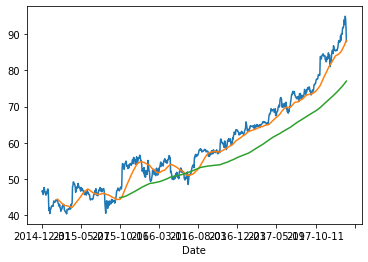

In [15]:
ms['Close'].plot()
ms['MA40'].plot()
ms['MA200'].plot()

In [16]:
ms['MA3-1'] = ms['Close'].rolling(3).mean()
ms['MA3-2'] = (ms['Close'] + ms['Close'].shift(1) + ms['Close'].shift(2)) /3
ms.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PostPre,priceDiff,dialyReturn,Direction,MA40,MA200,MA3-1,MA3-2
Date,,,,,,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,46.450001,0.209999,0.309997,0.006630,1,NaN,NaN,NaN,NaN
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,46.759998,-0.389999,-0.429996,-0.009281,-1,NaN,NaN,46.513334,46.513334
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,46.330002,0.049999,-0.680000,-0.014896,-1,NaN,NaN,46.246667,46.246667
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,45.650002,0.329998,0.579998,0.012546,1,NaN,NaN,46.070001,46.070001


In [18]:
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,Price1,PostPre,priceDiff,dialyReturn,Direction,MA40,MA200,MA3-1,MA3-2
Date,,,,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,93.919998,-0.619995,-1.180000,-0.012724,-1,87.29350,76.50885,93.573331,93.573331
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.739998,1.010002,2.270004,0.023892,1,87.56225,76.65650,93.889999,93.889999
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,95.010002,-0.220001,-0.750000,-0.007957,-1,87.89175,76.80085,94.003334,94.003334
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,94.260002,-0.620003,-2.480003,-0.027021,-1,88.14650,76.93455,93.683334,93.683334
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,91.779999,-1.220001,-3.779999,-0.042955,-1,88.27700,77.04705,91.346667,91.346667


In [19]:
ms['Shares'] = [1 if ms['MA40'].loc[ei] >  ms['MA200'].loc[ei] else 0 for ei in ms.index]
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,Price1,PostPre,priceDiff,dialyReturn,Direction,MA40,MA200,MA3-1,MA3-2,Shares
Date,,,,,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,93.919998,-0.619995,-1.180000,-0.012724,-1,87.29350,76.50885,93.573331,93.573331,1
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.739998,1.010002,2.270004,0.023892,1,87.56225,76.65650,93.889999,93.889999,1
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,95.010002,-0.220001,-0.750000,-0.007957,-1,87.89175,76.80085,94.003334,94.003334,1
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,94.260002,-0.620003,-2.480003,-0.027021,-1,88.14650,76.93455,93.683334,93.683334,1
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,91.779999,-1.220001,-3.779999,-0.042955,-1,88.27700,77.04705,91.346667,91.346667,1


In [23]:
ms['Close1'] = ms['Close'].shift(-1)
ms['Profile']  = [ ms.loc[ei,'Close1']-ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares'] == 1 else 0 for ei in ms.index ]
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,Price1,PostPre,priceDiff,dialyReturn,Direction,MA40,MA200,MA3-1,MA3-2,Shares,Close1,Profile
Date,,,,,,,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,93.919998,-0.619995,-1.180000,-0.012724,-1,87.29350,76.50885,93.573331,93.573331,1,95.010002,2.270004
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.739998,1.010002,2.270004,0.023892,1,87.56225,76.65650,93.889999,93.889999,1,94.260002,-0.750000
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,95.010002,-0.220001,-0.750000,-0.007957,-1,87.89175,76.80085,94.003334,94.003334,1,91.779999,-2.480003
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,94.260002,-0.620003,-2.480003,-0.027021,-1,88.14650,76.93455,93.683334,93.683334,1,88.000000,-3.779999
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,91.779999,-1.220001,-3.779999,-0.042955,-1,88.27700,77.04705,91.346667,91.346667,1,NaN,NaN


31.700001

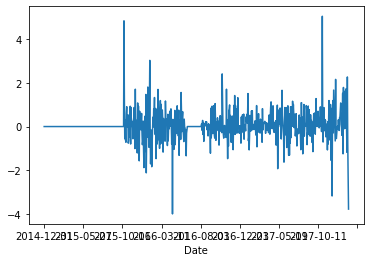

In [29]:
ms['Profile'].plot()
ms['Profile'].sum()

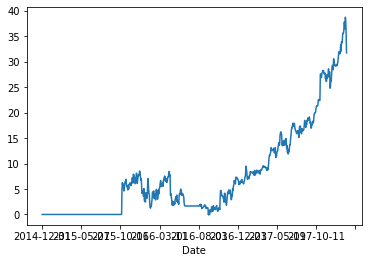

In [30]:
ms['Wealth']=ms['Profile'].cumsum()
ms.tail()
ms['Wealth'].plot()